**Simple Data Exploration of Top 500 Indian Cities**
----------------------------------------------------

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
%matplotlib inline

from subprocess import check_output

cities = pd.read_csv('cities_r2.csv')

----------
**States according to literacy rate**
-------------------------------------


----------


>  - Literacy rate in eastern states is higher as compared to rest of the India
>  - 5 out of 7 states in eastern India are in top 10
>  - Most of the northern states have low literacy rate

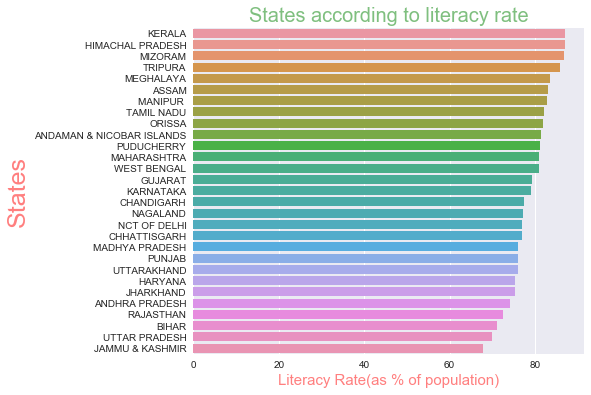

In [4]:
# States according to literacy rate
lit_by_states  = cities.groupby('state_name').agg({'literates_total': np.sum})
pop_by_states  = cities.groupby('state_name').agg({'population_total': np.sum})
literate_rate = lit_by_states.literates_total * 100 / pop_by_states.population_total
literate_rate = literate_rate.sort_values(ascending=False)

plt.subplots(figsize=(7, 6))
ax = sns.barplot(x=literate_rate, y=literate_rate.index)
ax.set_title('States according to literacy rate', size=20, alpha=0.5, color='green')
ax.set_xlabel('Literacy Rate(as % of population)', size=15, alpha=0.5, color='red')
ax.set_ylabel('States', size=25, alpha=0.5, color='red')

----------


**States by female literacy rate**
----------------------------------


----------

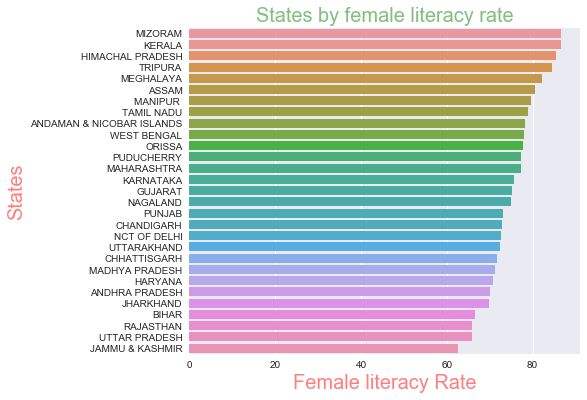

In [5]:
def proportion(group, col1, col2):
    col = group[col1].sum()
    tot_pop = group[col2].sum()
    return (col * 100 / tot_pop)

prop_female_lit = cities.groupby('state_name').apply(proportion, 'literates_female', 'population_female')
prop_male_lit = cities.groupby('state_name').apply(proportion, 'literates_male', 'population_male')

summary = pd.DataFrame({'literates_female': prop_female_lit, 'literates_male':prop_male_lit})
fem_summary = summary.sort_values([('literates_female')], ascending=False)

plt.subplots(figsize=(7, 6))
ax = sns.barplot(x='literates_female', y=fem_summary.index, data=fem_summary)
ax.set_title('States by female literacy rate', size=20, alpha=0.5, color='green')
ax.set_xlabel('Female literacy Rate', size=20, alpha=0.5, color='red')
ax.set_ylabel('States', size=20, alpha=0.5, color='red')

----------


**States by male literacy rate**
----------------------------------


----------

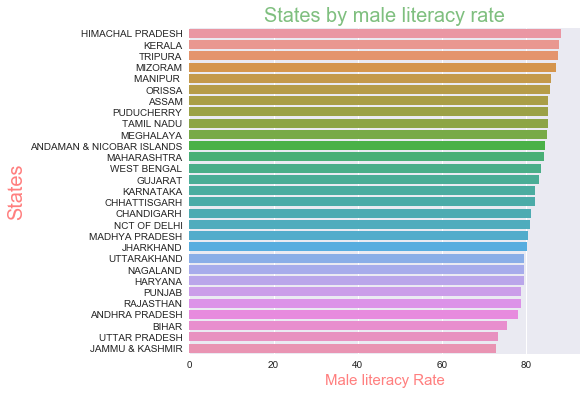

In [6]:
male_summary = summary.sort_values([('literates_male')], ascending=False)

plt.subplots(figsize=(7, 6))
ax = sns.barplot(x='literates_male', y=male_summary.index, data=male_summary)
ax.set_title('States by male literacy rate', size=20, alpha=0.5, color='green')
ax.set_xlabel('Male literacy Rate', size=15, alpha=0.5, color='red')
ax.set_ylabel('States', size=20, alpha=0.5, color='red')

----------
**Is there any relation between sex ratio and female literacy?**
----------------------------------------------------------------
----------



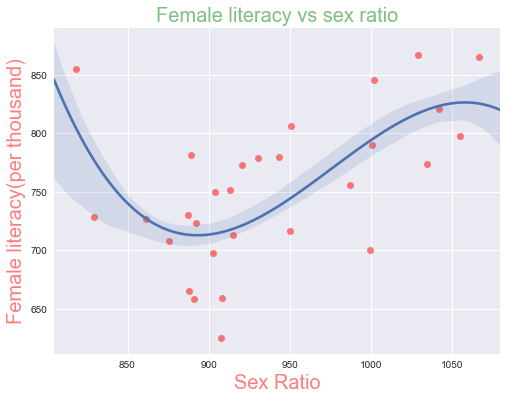

In [7]:
prop_female_lit = cities.groupby('state_name').apply(proportion, 'literates_female', 'population_female')
prop_female_lit = prop_female_lit * 10
sex_ratio_by_state = cities.groupby('state_name').agg({'sex_ratio':np.mean})

prop_female_lit = pd.DataFrame({'female_lit':prop_female_lit})
df = pd.concat([prop_female_lit, sex_ratio_by_state], axis='columns')

plt.subplots(figsize=(8, 6))
ax = sns.regplot(x='sex_ratio', y='female_lit', data=df, order=3, ci=50, 
                 scatter_kws={'alpha':0.5, 'color':'red'})
ax.set_title('Female literacy vs sex ratio', size=20, alpha=0.5, color='green')
ax.set_xlabel('Sex Ratio', size=20, alpha=0.5, color='red')
ax.set_ylabel('Female literacy(per thousand)', size=20, alpha=0.5, color='red')

----------


**Top 5 states with most literates by number**
----------------------------------------------


----------

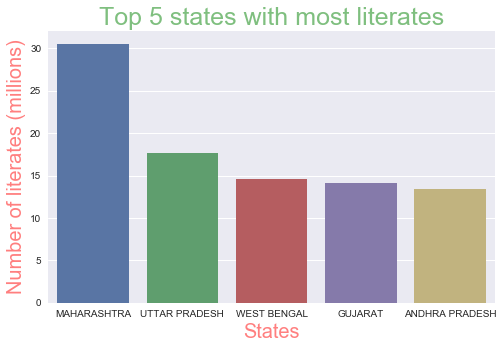

In [8]:
# Top 5 most literate state by population
lit_by_states  = cities.groupby('state_name').agg({'literates_total': np.sum}).sort_values(
    [('literates_total')], ascending=False)[:5]
lit_by_states = lit_by_states / 1000000
plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=lit_by_states, x=lit_by_states.index, y='literates_total')

ax.set_title('Top 5 states with most literates', size=25, alpha=0.5, color='green')
ax.set_xlabel('States', size=20, alpha=0.5, color='red')
ax.set_ylabel('Number of literates (millions)', size=20, alpha=0.5, color='red')

----------
**States with most 500 cities**
----------
-------------------------------

 - Bigger states have more cities in top 500

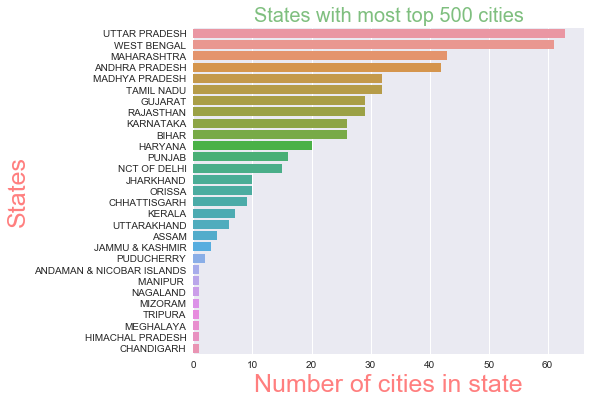

In [9]:
# states which has most top 500 cities
most_cities_in_states = cities.state_name.value_counts().sort_values(ascending=False)
plt.subplots(figsize=(7, 6))
ax = sns.barplot(x=most_cities_in_states, y=most_cities_in_states.index)

ax.set_title('States with most top 500 cities', size=20, alpha=0.5, color='green')
ax.set_xlabel('Number of cities in state', size=25, alpha=0.5, color='red')
ax.set_ylabel('States', size=25, alpha=0.5, color='red')

In [10]:
states_by_sexratio = cities.pivot_table(index=['state_name'], values=['literates_female', 'sex_ratio', 'child_sex_ratio'], 
                   aggfunc={'literates_female':np.sum, 'sex_ratio':np.mean, 'child_sex_ratio':np.mean})
states_by_sexratio = states_by_sexratio.sort_values(['sex_ratio', 'literates_female'], ascending=False)
states_by_sexratio

,child_sex_ratio,literates_female,sex_ratio
state_name,,,
KERALA,957.000000,1228309,1066.714286
MANIPUR,939.000000,108452,1055.000000
MEGHALAYA,937.000000,59893,1042.000000
PUDUCHERRY,976.000000,213043,1035.000000
MIZORAM,989.000000,128332,1029.000000
TRIPURA,940.000000,169109,1002.000000
TAMIL NADU,963.187500,5464897,1001.031250
ANDHRA PRADESH,943.571429,6285081,999.404762
KARNATAKA,945.423077,5807584,987.115385


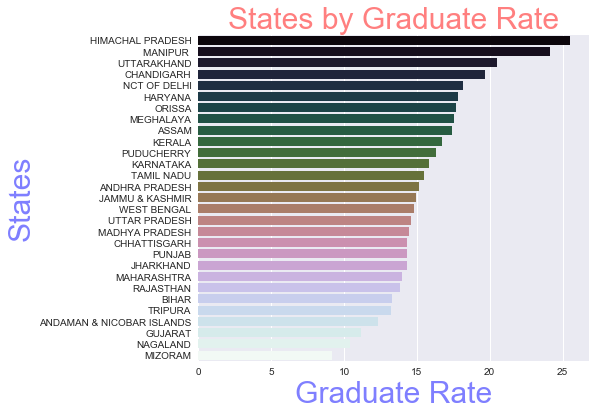

In [11]:

graduates_rate = cities.groupby(['state_name']).apply(proportion, 
                                                      'total_graduates', 
                                                      'population_total').sort_values(ascending=False)

plt.subplots(figsize=(7, 6))
ax = sns.barplot(x=graduates_rate, y=graduates_rate.index, palette='cubehelix')
ax.set_title('States by Graduate Rate', size=30, color='red', alpha=0.5)
ax.set_xlabel('Graduate Rate', size=30, color='blue', alpha=0.5)
ax.set_ylabel('States', size=30, color='blue', alpha=0.5)

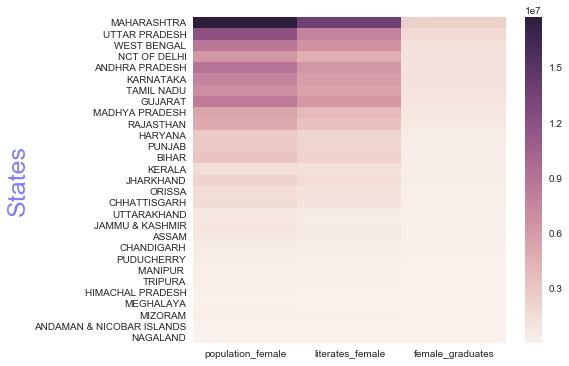

In [12]:
female_stats = cities.groupby(['state_name']).agg({'population_female':np.sum, 
                                        'literates_female':np.sum, 
                                        'female_graduates':np.sum}).sort_values(['female_graduates'], ascending=False)
plt.subplots(figsize=(7, 6))
ax = sns.heatmap(female_stats)
ax.set_ylabel('States', size=25, color='blue', alpha=0.5)